In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))


(265703, 12)


In [4]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(258562, 12)


dataset size:  (258562, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  200 observers and  36  stimuli.


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

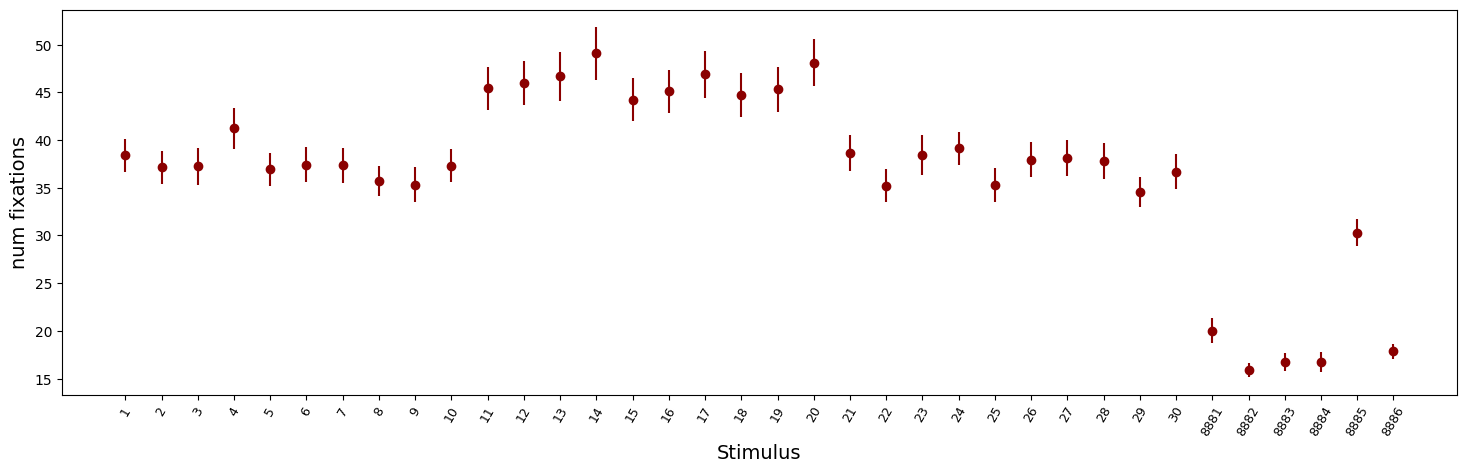

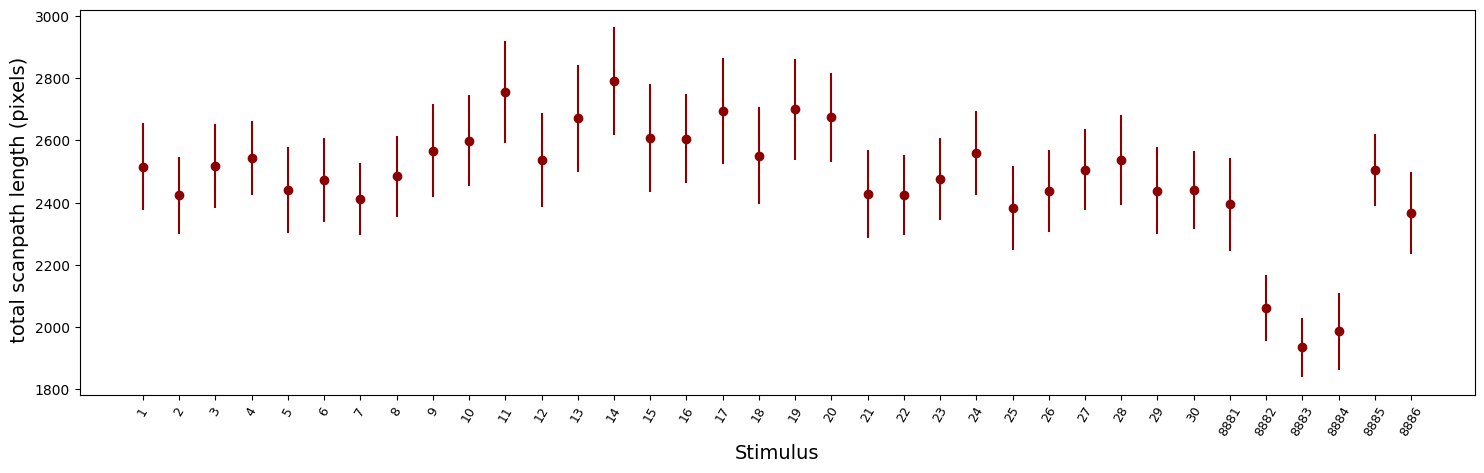

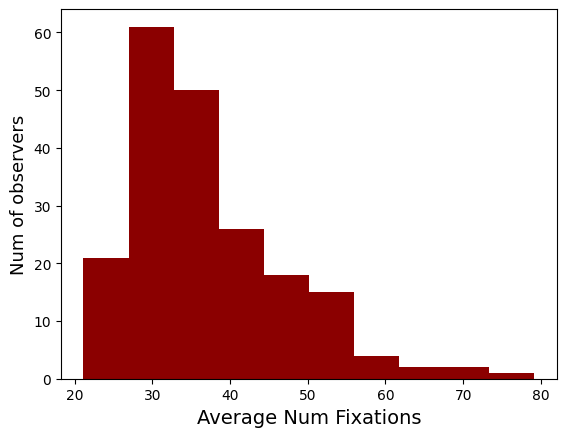

In [5]:

sizeX,sizeY=1280, 960


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [6]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
map_stim_subj = {}
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[117:,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[117+x] = +1
            map_stim_subj[i] = map_stim_subj.get(i, []) + [DyslexiaDat.subjects[117+x]]
            set_subj.add(117+x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

3 Stimuli with complete data: [7, 32, 33]
33 Stimuli with Missing data: {0: 1, 1: 3, 2: 3, 3: 1, 4: 4, 5: 3, 6: 4, 8: 1, 9: 7, 10: 6, 11: 7, 12: 3, 13: 2, 14: 4, 15: 4, 16: 6, 17: 3, 18: 3, 19: 4, 20: 4, 21: 2, 22: 7, 23: 4, 24: 4, 25: 3, 26: 2, 27: 5, 28: 5, 29: 3, 30: 5, 31: 6, 34: 8, 35: 5}
Max subject that have not seen the stimulus: 8
57 Subjects with missing data: {177: 1, 127: 1, 160: 1, 181: 1, 161: 1, 199: 1, 121: 1, 173: 1, 198: 1, 158: 1, 167: 1, 196: 1, 142: 1, 146: 1, 182: 1, 119: 1, 120: 1, 124: 1, 136: 1, 147: 1, 130: 1, 139: 1, 153: 1, 166: 1, 191: 1, 184: 1, 171: 1, 149: 1, 154: 1, 169: 1, 197: 1, 155: 1, 163: 1, 150: 1, 179: 1, 186: 1, 128: 1, 125: 1, 152: 1, 176: 1, 133: 1, 138: 1, 162: 1, 188: 1, 134: 1, 164: 1, 141: 1, 165: 1, 195: 1, 122: 1, 123: 1, 126: 1, 137: 1, 185: 1, 145: 1, 159: 1, 178: 1}


In [7]:
s = 0
for i in range(0,10):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the first 10 stimuli')

s = 0
for i in range(11,20):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 11 to 20 stimuli')

s = 0
for i in range(21,30):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 21 to 30 stimuli')

27 Subjects with missing data for the first 10 stimuli
36 Subjects with missing data for the stimuli from 11 to 20 stimuli
35 Subjects with missing data for the stimuli from 21 to 30 stimuli


Here we check for the Graz subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Compared to the Munich data here it seems to be not possible to remove, either the stimuli with subject that have not seen them or the subjects that have not seen a specific stimulus.

The solution is to exclude dynamically the subjects that have not seen a specific stimulus.

---

In [8]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [9]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [10]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [11]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

---

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

We start from the Similarity features of a single stimulus

In [12]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [13]:
list(set_subj)

[128,
 130,
 133,
 134,
 136,
 137,
 138,
 139,
 141,
 142,
 145,
 146,
 147,
 149,
 150,
 152,
 153,
 154,
 155,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 169,
 171,
 173,
 176,
 177,
 178,
 179,
 181,
 182,
 184,
 185,
 186,
 188,
 191,
 195,
 196,
 197,
 198,
 199,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

In [14]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [15]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': progressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [16]:
stimuli = list(range(0, 30))

In [17]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\Utente\AppData\Local\Temp\ipykernel_98016\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered i

Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [18]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [19]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', match=True, Thr=0)

In [20]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [21]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [22]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(GrazSubs_Idx))

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(100):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(MunichSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [23]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 74 train subjects so 74 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

100
30
74
9


In [24]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [26]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
    def forward(self, x): 
        return x

In [27]:
def train_test_pipeline(stimuli, momentum = 0.8, plot_confusion_matrix=False):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))
    conf_matrix_unique = np.array([set() for _ in range(4)]).reshape(2,2)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(100):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)

        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
            for j, subj_id in enumerate(test_subjects[i]):
                x = labels_test[i][j]
                y = predictions[j].cpu().numpy()
                conf_matrix_unique[x, y].add(subj_id)

        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    final_matrix = np.zeros((2, 2))
    for x in range(2):
        for y in range(2):
            final_matrix[x, y] = len(conf_matrix_unique[x,y])

    if plot_confusion_matrix:
        plt.figure(figsize=(6, 5))
        plt.imshow(final_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ['Control', 'Dyslexia'], rotation=45)
        plt.yticks(tick_marks, ['Control', 'Dyslexia'])

        thresh = final_matrix.max() / 2.
        for i, j in np.ndindex(final_matrix.shape):
            plt.text(j, i, format(final_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if final_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    return results

In [28]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, subj_id in enumerate(subj):
        vector_roi[s][0] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][1] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][2] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 60)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(60, 30)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(30, 15) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(15, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6223599314689636
Epoch 5 loss: 0.5141498446464539
Epoch 10 loss: 0.38358116149902344
Epoch 15 loss: 0.3648049533367157
Epoch 0 loss: 0.6650290489196777
Epoch 5 loss: 0.424611359834671
Epoch 10 loss: 0.3757413327693939
Epoch 15 loss: 0.3592425584793091
Epoch 0 loss: 0.6790111660957336
Epoch 5 loss: 0.49525415897369385
Epoch 10 loss: 0.391702800989151
Epoch 15 loss: 0.3557792901992798
Epoch 0 loss: 0.6908017992973328
Epoch 5 loss: 0.515507698059082
Epoch 10 loss: 0.39560163021087646
Epoch 15 loss: 0.3535081446170807
Epoch 0 loss: 0.7420623898506165
Epoch 5 loss: 0.5706796646118164
Epoch 10 loss: 0.42286577820777893
Epoch 15 loss: 0.3834608495235443
Epoch 0 loss: 0.6713930368423462
Epoch 5 loss: 0.45201337337493896
Epoch 10 loss: 0.3869755268096924
Epoch 15 loss: 0.3639834225177765
Epoch 0 loss: 0.7296798229217529
Epoch 5 loss: 0.4581634998321533
Epoch 10 loss: 0.39017564058303833
Epoch 15 loss: 0.36221712827682495
Epoch 0 loss: 0.7780332565307617
Epoch 

Approximation Error: -5.6759683502605185e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_159236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


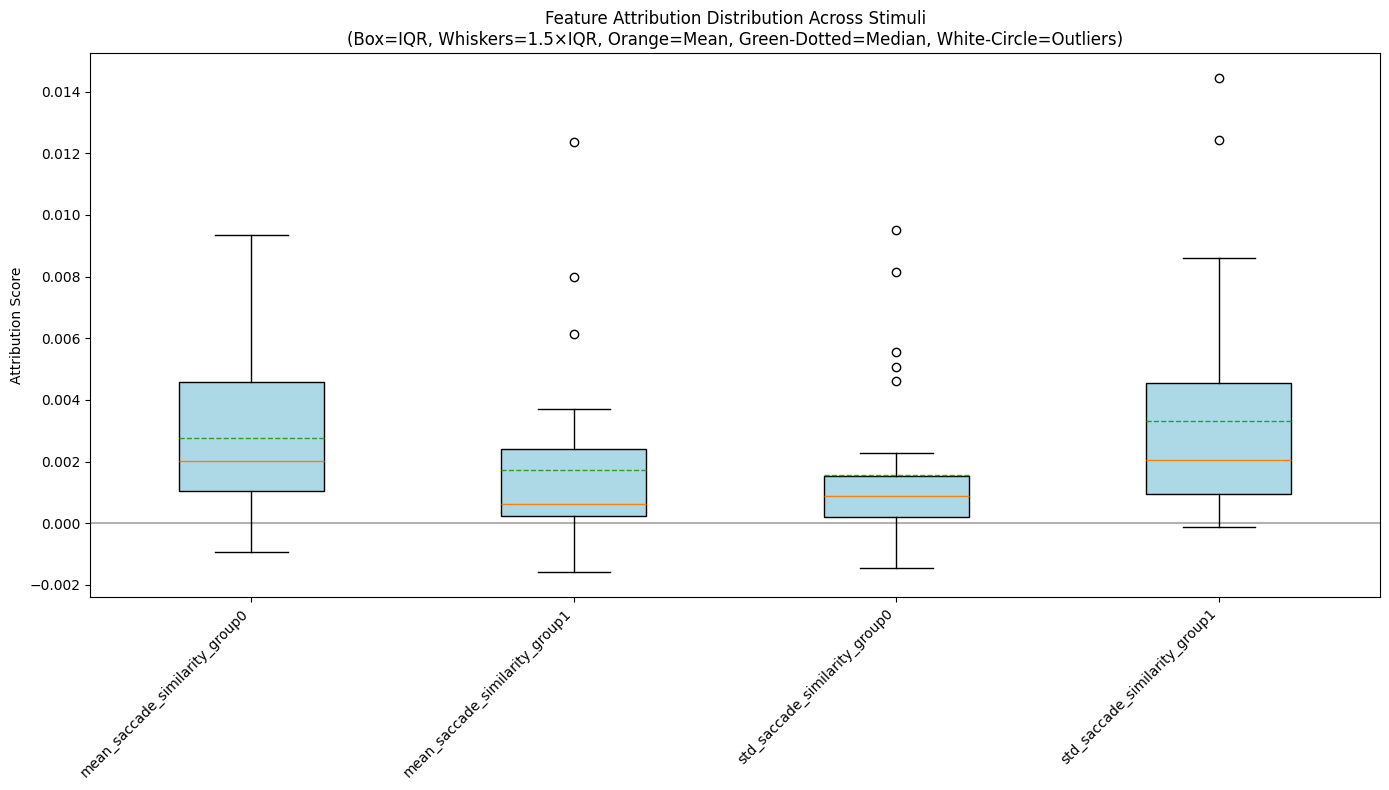


Feature Attribution Summary:
------------------------------------------------------------
mean_saccade_similarity_group0: Mean= 0.0027, Std= 0.0025, Min=-0.0009, Max= 0.0094
mean_saccade_similarity_group1: Mean= 0.0017, Std= 0.0028, Min=-0.0016, Max= 0.0124
std_saccade_similarity_group0 : Mean= 0.0016, Std= 0.0025, Min=-0.0015, Max= 0.0095
std_saccade_similarity_group1 : Mean= 0.0033, Std= 0.0035, Min=-0.0001, Max= 0.0144


In [ ]:
feature_names = [
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original

In [ ]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(210, 110)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(110, 55)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(55, 27) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(27, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.6838582754135132
Epoch 5 loss: 0.44151413440704346
Epoch 10 loss: 0.3516014814376831
Epoch 15 loss: 0.3314162492752075
Epoch 0 loss: 0.6572334170341492
Epoch 5 loss: 0.41256844997406006
Epoch 10 loss: 0.35480284690856934
Epoch 15 loss: 0.3443736433982849
Epoch 0 loss: 0.6897721290588379
Epoch 5 loss: 0.3929348886013031
Epoch 10 loss: 0.3313719630241394
Epoch 15 loss: 0.3393087089061737
Epoch 0 loss: 0.8915048837661743
Epoch 5 loss: 0.4476863741874695
Epoch 10 loss: 0.3382943570613861
Epoch 15 loss: 0.3386009931564331
Epoch 0 loss: 0.7338564991950989
Epoch 5 loss: 0.3980788588523865
Epoch 10 loss: 0.36205995082855225
Epoch 15 loss: 0.35440951585769653
Epoch 0 loss: 0.7388212084770203
Epoch 5 loss: 0.4539814591407776
Epoch 10 loss: 0.3818790316581726
Epoch 15 loss: 0.3515537977218628
Epoch 0 loss: 0.723686933517456
Epoch 5 loss: 0.3937302231788635
Epoch 10 loss: 0.3491482138633728
Epoch 15 loss: 0.3484496772289276
Epoch 0 loss: 0.6472791433334351
Epoch 

In [ ]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6838582754135132
Epoch 5 loss: 0.4735492467880249
Epoch 10 loss: 0.37517082691192627
Epoch 15 loss: 0.3559158444404602
Epoch 0 loss: 0.6572334170341492
Epoch 5 loss: 0.44691941142082214
Epoch 10 loss: 0.37858399748802185
Epoch 15 loss: 0.358671098947525
Epoch 0 loss: 0.6897721290588379
Epoch 5 loss: 0.4242306649684906
Epoch 10 loss: 0.35983383655548096
Epoch 15 loss: 0.3606119453907013
Epoch 0 loss: 0.8915048837661743
Epoch 5 loss: 0.4544459283351898
Epoch 10 loss: 0.35640236735343933
Epoch 15 loss: 0.35479262471199036
Epoch 0 loss: 0.7338564991950989
Epoch 5 loss: 0.41791415214538574
Epoch 10 loss: 0.3876376748085022
Epoch 15 loss: 0.38733914494514465
Epoch 0 loss: 0.7388212084770203
Epoch 5 loss: 0.46767643094062805
Epoch 10 loss: 0.39231449365615845
Epoch 15 loss: 0.3940730690956116
Epoch 0 loss: 0.723686933517456
Epoch 5 loss: 0.4061560034751892
Epoch 10 loss: 0.3749091327190399
Epoch 15 loss: 0.36018913984298706
Epoch 0 loss: 0.6472791433334351
E

Approximation Error: -9.908831998473033e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_159236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


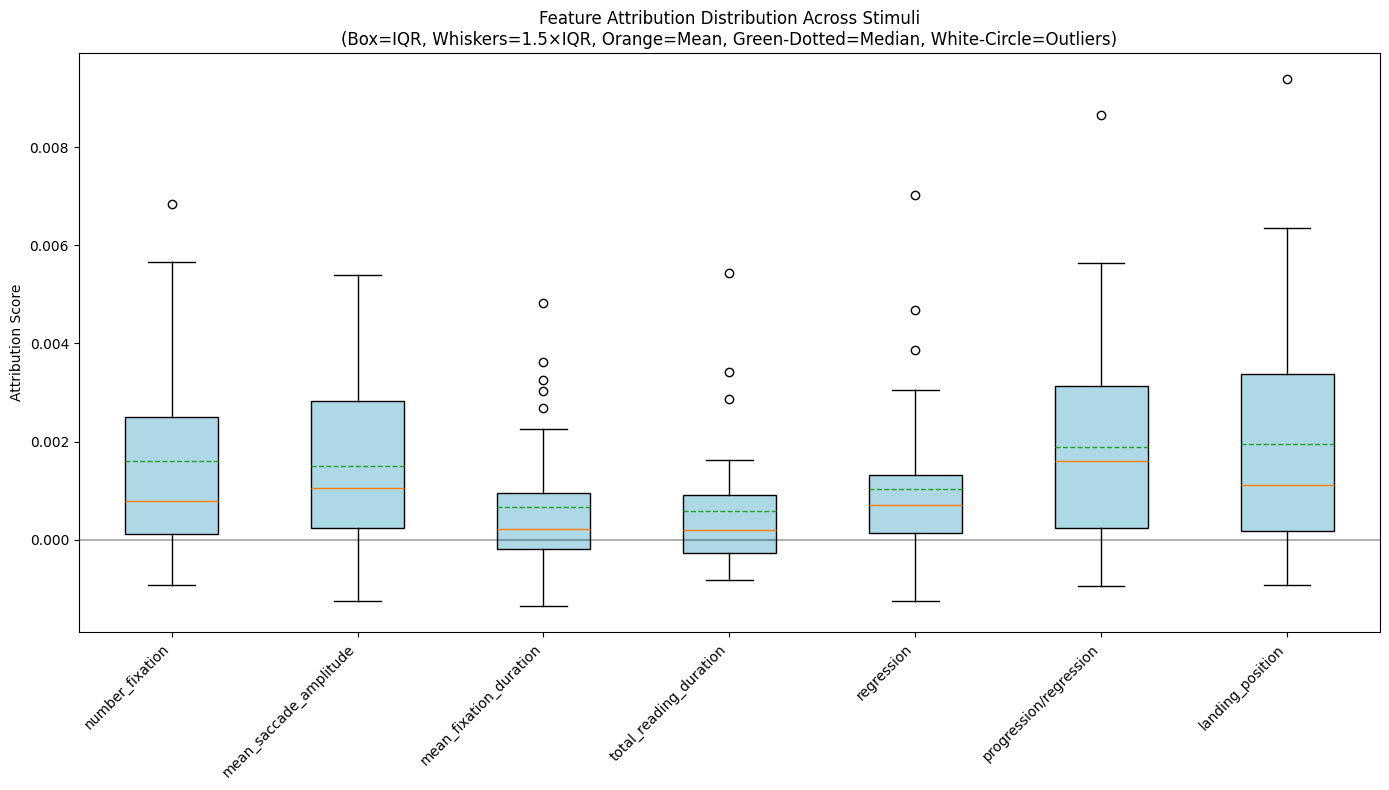


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0016, Std= 0.0021, Min=-0.0009, Max= 0.0068
mean_saccade_amplitude        : Mean= 0.0015, Std= 0.0019, Min=-0.0012, Max= 0.0054
mean_fixation_duration        : Mean= 0.0007, Std= 0.0015, Min=-0.0014, Max= 0.0048
total_reading_duration        : Mean= 0.0006, Std= 0.0013, Min=-0.0008, Max= 0.0054
regression                    : Mean= 0.0010, Std= 0.0018, Min=-0.0012, Max= 0.0070
progression/regression        : Mean= 0.0019, Std= 0.0021, Min=-0.0009, Max= 0.0087
landing_position              : Mean= 0.0020, Std= 0.0025, Min=-0.0009, Max= 0.0094


In [ ]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original (without mean saccade amplitude)

In [ ]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 90)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(90, 45)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(45, 23) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(23, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8050928711891174
Epoch 5 loss: 0.48010969161987305
Epoch 10 loss: 0.38421615958213806
Epoch 15 loss: 0.33463096618652344
Epoch 0 loss: 0.7309001684188843
Epoch 5 loss: 0.4517068564891815
Epoch 10 loss: 0.38225841522216797
Epoch 15 loss: 0.33708903193473816
Epoch 0 loss: 0.7769675254821777
Epoch 5 loss: 0.42753171920776367
Epoch 10 loss: 0.35295936465263367
Epoch 15 loss: 0.34301993250846863
Epoch 0 loss: 0.6929197311401367
Epoch 5 loss: 0.4437657296657562
Epoch 10 loss: 0.3759053647518158
Epoch 15 loss: 0.35326308012008667
Epoch 0 loss: 0.810725748538971
Epoch 5 loss: 0.4601110517978668
Epoch 10 loss: 0.36325863003730774
Epoch 15 loss: 0.36173516511917114
Epoch 0 loss: 0.6407718062400818
Epoch 5 loss: 0.5306494832038879
Epoch 10 loss: 0.3654789328575134
Epoch 15 loss: 0.34826892614364624
Epoch 0 loss: 0.8816272616386414
Epoch 5 loss: 0.462045818567276
Epoch 10 loss: 0.3745052218437195
Epoch 15 loss: 0.3429156541824341
Epoch 0 loss: 0.7274460792541504


In [ ]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8050928711891174
Epoch 5 loss: 0.5009761452674866
Epoch 10 loss: 0.43671634793281555
Epoch 15 loss: 0.36482834815979004
Epoch 0 loss: 0.7309001684188843
Epoch 5 loss: 0.48362335562705994
Epoch 10 loss: 0.42024412751197815
Epoch 15 loss: 0.37100347876548767
Epoch 0 loss: 0.7769675254821777
Epoch 5 loss: 0.44755470752716064
Epoch 10 loss: 0.3819372057914734
Epoch 15 loss: 0.36328554153442383
Epoch 0 loss: 0.6929197311401367
Epoch 5 loss: 0.45948609709739685
Epoch 10 loss: 0.4052612781524658
Epoch 15 loss: 0.3885993957519531
Epoch 0 loss: 0.810725748538971
Epoch 5 loss: 0.48363691568374634
Epoch 10 loss: 0.39496761560440063
Epoch 15 loss: 0.3862797021865845
Epoch 0 loss: 0.6407718062400818
Epoch 5 loss: 0.558136522769928
Epoch 10 loss: 0.40091389417648315
Epoch 15 loss: 0.3709757924079895
Epoch 0 loss: 0.8816272616386414
Epoch 5 loss: 0.49109217524528503
Epoch 10 loss: 0.3993760943412781
Epoch 15 loss: 0.36822423338890076
Epoch 0 loss: 0.7274460792541504

Approximation Error: 8.824723772704601e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_159236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


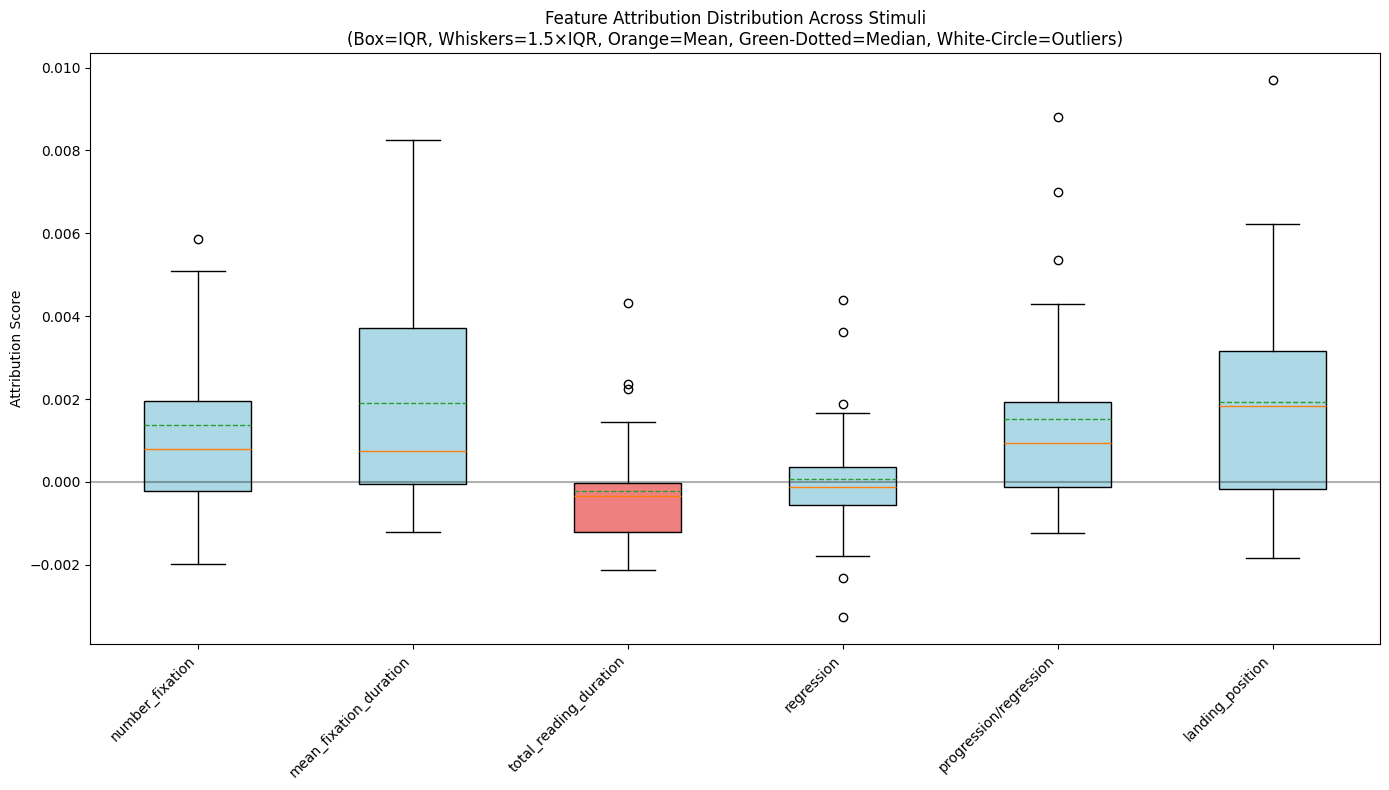


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0014, Std= 0.0020, Min=-0.0020, Max= 0.0059
mean_fixation_duration        : Mean= 0.0019, Std= 0.0027, Min=-0.0012, Max= 0.0082
total_reading_duration        : Mean=-0.0002, Std= 0.0014, Min=-0.0021, Max= 0.0043
regression                    : Mean= 0.0001, Std= 0.0015, Min=-0.0033, Max= 0.0044
progression/regression        : Mean= 0.0015, Std= 0.0024, Min=-0.0012, Max= 0.0088
landing_position              : Mean= 0.0019, Std= 0.0026, Min=-0.0018, Max= 0.0097


In [ ]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original + Additional Features

In [ ]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_saccade_amplitude']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8087568283081055
Epoch 5 loss: 0.42478978633880615
Epoch 10 loss: 0.3621729910373688
Epoch 15 loss: 0.3379978835582733
Epoch 0 loss: 0.861488938331604
Epoch 5 loss: 0.4427603781223297
Epoch 10 loss: 0.35116660594940186
Epoch 15 loss: 0.3362213671207428
Epoch 0 loss: 0.7446295022964478
Epoch 5 loss: 0.41149818897247314
Epoch 10 loss: 0.3422343134880066
Epoch 15 loss: 0.3304702639579773
Epoch 0 loss: 0.5897270441055298
Epoch 5 loss: 0.3927591145038605
Epoch 10 loss: 0.3393057882785797
Epoch 15 loss: 0.3317115306854248
Epoch 0 loss: 0.7123754620552063
Epoch 5 loss: 0.3529837429523468
Epoch 10 loss: 0.3351154327392578
Epoch 15 loss: 0.3273007571697235
Epoch 0 loss: 0.65385901927948
Epoch 5 loss: 0.43275555968284607
Epoch 10 loss: 0.342046856880188
Epoch 15 loss: 0.32223066687583923
Epoch 0 loss: 0.7295570373535156
Epoch 5 loss: 0.42091017961502075
Epoch 10 loss: 0.36251407861709595
Epoch 15 loss: 0.32864537835121155
Epoch 0 loss: 0.6735354065895081
Epoch 

In [ ]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8087568283081055
Epoch 5 loss: 0.4448048770427704
Epoch 10 loss: 0.38689419627189636
Epoch 15 loss: 0.347630113363266
Epoch 0 loss: 0.861488938331604
Epoch 5 loss: 0.4512609541416168
Epoch 10 loss: 0.3789386749267578
Epoch 15 loss: 0.358064204454422
Epoch 0 loss: 0.7446295022964478
Epoch 5 loss: 0.4426078200340271
Epoch 10 loss: 0.35497504472732544
Epoch 15 loss: 0.3478204905986786
Epoch 0 loss: 0.5897270441055298
Epoch 5 loss: 0.4085969924926758
Epoch 10 loss: 0.35351860523223877
Epoch 15 loss: 0.33307352662086487
Epoch 0 loss: 0.7123754620552063
Epoch 5 loss: 0.3656628131866455
Epoch 10 loss: 0.35041895508766174
Epoch 15 loss: 0.34078359603881836
Epoch 0 loss: 0.65385901927948
Epoch 5 loss: 0.462670236825943
Epoch 10 loss: 0.37546589970588684
Epoch 15 loss: 0.34341028332710266
Epoch 0 loss: 0.7295570373535156
Epoch 5 loss: 0.45078152418136597
Epoch 10 loss: 0.3869748115539551
Epoch 15 loss: 0.35492414236068726
Epoch 0 loss: 0.6735354065895081
Epoch 

Approximation Error: -0.00014479196397587657 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_159236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


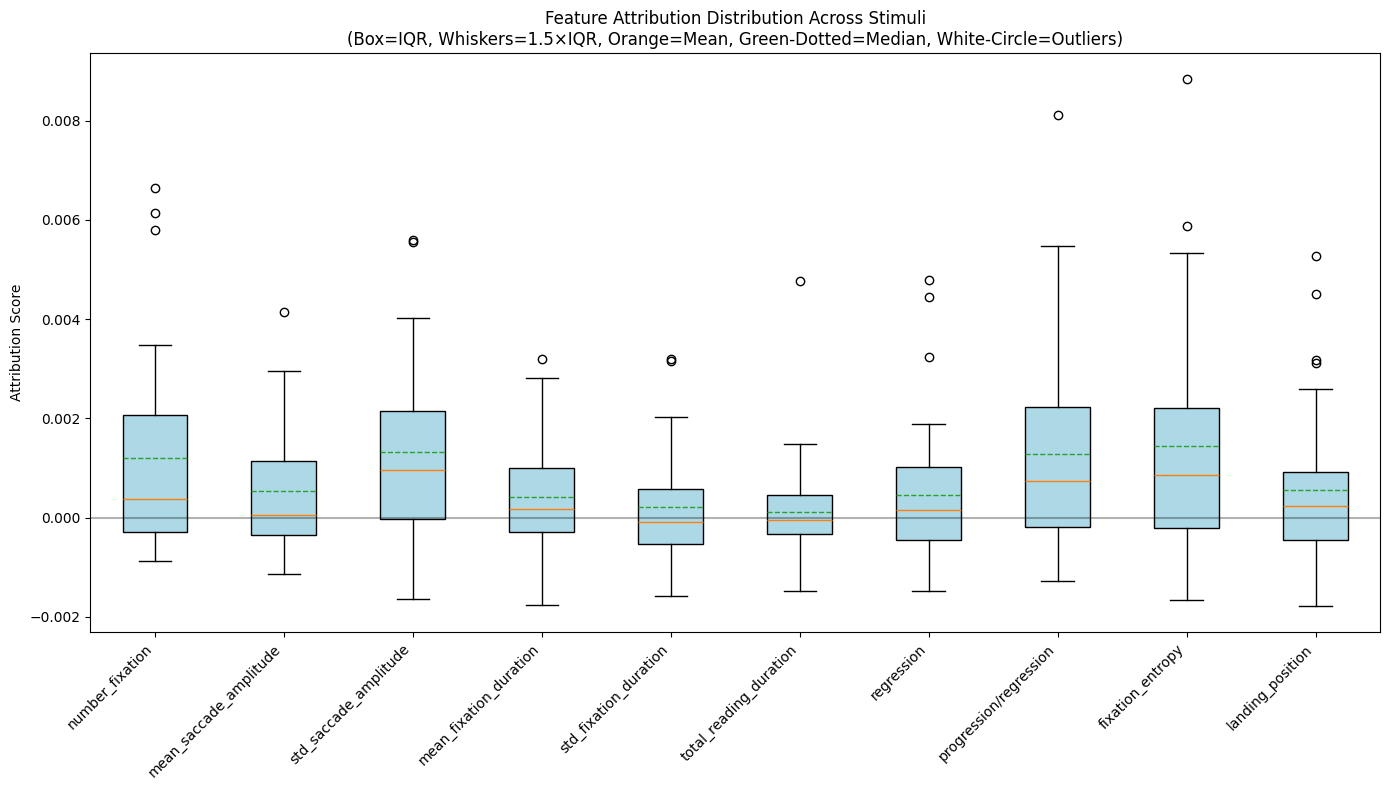


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0012, Std= 0.0020, Min=-0.0009, Max= 0.0067
mean_saccade_amplitude        : Mean= 0.0005, Std= 0.0013, Min=-0.0011, Max= 0.0041
std_saccade_amplitude         : Mean= 0.0013, Std= 0.0018, Min=-0.0016, Max= 0.0056
mean_fixation_duration        : Mean= 0.0004, Std= 0.0012, Min=-0.0018, Max= 0.0032
std_fixation_duration         : Mean= 0.0002, Std= 0.0011, Min=-0.0016, Max= 0.0032
total_reading_duration        : Mean= 0.0001, Std= 0.0011, Min=-0.0015, Max= 0.0048
regression                    : Mean= 0.0005, Std= 0.0015, Min=-0.0015, Max= 0.0048
progression/regression        : Mean= 0.0013, Std= 0.0021, Min=-0.0013, Max= 0.0081
fixation_entropy              : Mean= 0.0014, Std= 0.0023, Min=-0.0017, Max= 0.0088
landing_position              : Mean= 0.0005, Std= 0.0017, Min=-0.0018, Max= 0.0053


In [ ]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Similarity features (Avg and Std)

In [ ]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7446854114532471
Epoch 5 loss: 0.3383680284023285
Epoch 10 loss: 0.333661824464798
Epoch 15 loss: 0.3276379704475403
Epoch 0 loss: 0.7279102206230164
Epoch 5 loss: 0.38620632886886597
Epoch 10 loss: 0.34072598814964294
Epoch 15 loss: 0.3272883892059326
Epoch 0 loss: 0.7135229110717773
Epoch 5 loss: 0.354310005903244
Epoch 10 loss: 0.33867186307907104
Epoch 15 loss: 0.327102392911911
Epoch 0 loss: 0.698668897151947
Epoch 5 loss: 0.40315547585487366
Epoch 10 loss: 0.3331560492515564
Epoch 15 loss: 0.33050796389579773
Epoch 0 loss: 0.6956162452697754
Epoch 5 loss: 0.3881568908691406
Epoch 10 loss: 0.3378536105155945
Epoch 15 loss: 0.3341579735279083
Epoch 0 loss: 0.7673541903495789
Epoch 5 loss: 0.3839557468891144
Epoch 10 loss: 0.3369227647781372
Epoch 15 loss: 0.3201048672199249
Epoch 0 loss: 0.7269343137741089
Epoch 5 loss: 0.3798183798789978
Epoch 10 loss: 0.33677998185157776
Epoch 15 loss: 0.3352082371711731
Epoch 0 loss: 0.6652020812034607
Epoch 5 

In [ ]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7446854114532471
Epoch 5 loss: 0.35708287358283997
Epoch 10 loss: 0.3483462333679199
Epoch 15 loss: 0.3257910907268524
Epoch 0 loss: 0.7279102206230164
Epoch 5 loss: 0.40881454944610596
Epoch 10 loss: 0.37557223439216614
Epoch 15 loss: 0.3360334038734436
Epoch 0 loss: 0.7135229110717773
Epoch 5 loss: 0.38135212659835815
Epoch 10 loss: 0.3500503897666931
Epoch 15 loss: 0.33321473002433777
Epoch 0 loss: 0.698668897151947
Epoch 5 loss: 0.42798006534576416
Epoch 10 loss: 0.3583191931247711
Epoch 15 loss: 0.35149523615837097
Epoch 0 loss: 0.6956162452697754
Epoch 5 loss: 0.4228394031524658
Epoch 10 loss: 0.35149145126342773
Epoch 15 loss: 0.3483460545539856
Epoch 0 loss: 0.7673541903495789
Epoch 5 loss: 0.40120929479599
Epoch 10 loss: 0.35638874769210815
Epoch 15 loss: 0.33839550614356995
Epoch 0 loss: 0.7269343137741089
Epoch 5 loss: 0.40663060545921326
Epoch 10 loss: 0.35431769490242004
Epoch 15 loss: 0.34239545464515686
Epoch 0 loss: 0.6652020812034607


Approximation Error: 2.276359282404883e-06 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_159236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


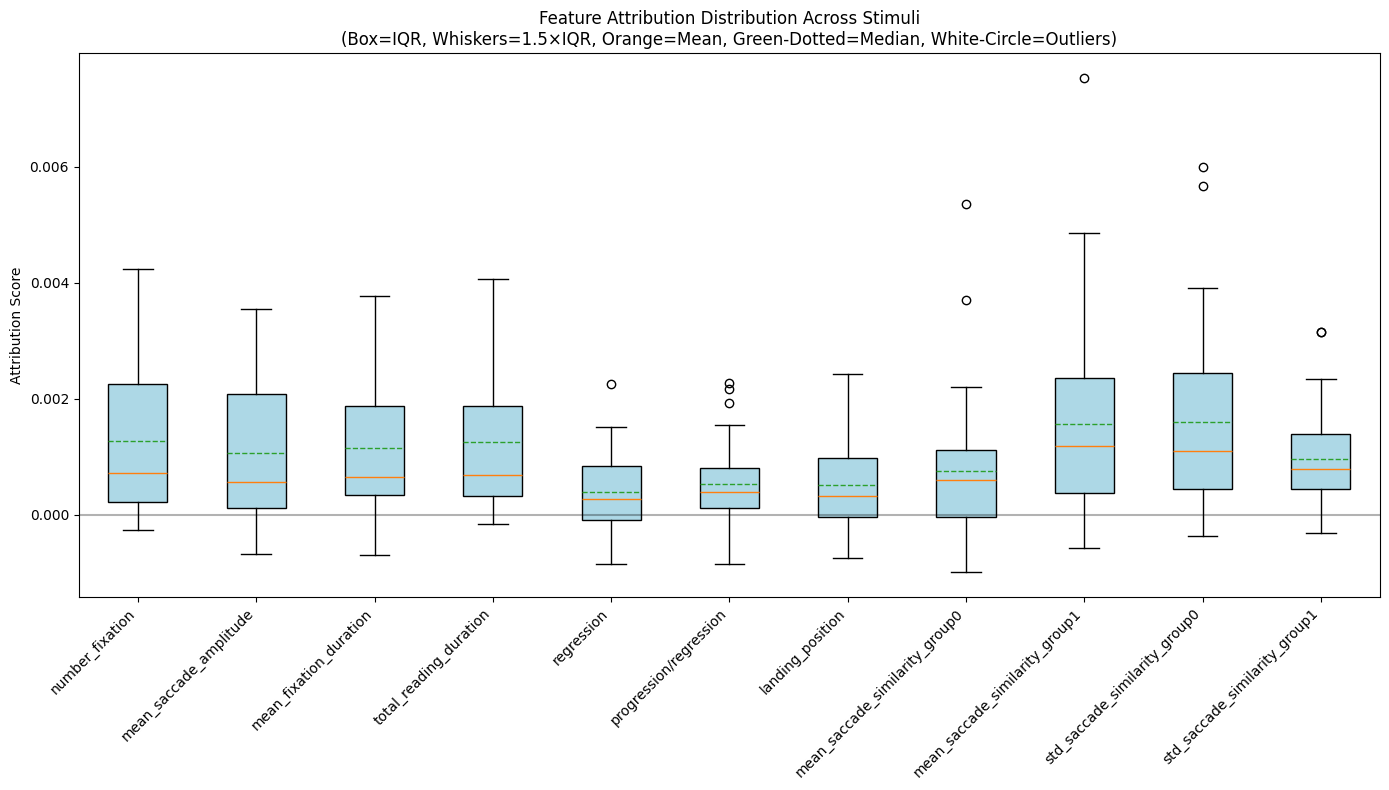


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0013, Std= 0.0014, Min=-0.0003, Max= 0.0042
mean_saccade_amplitude        : Mean= 0.0011, Std= 0.0012, Min=-0.0007, Max= 0.0036
mean_fixation_duration        : Mean= 0.0011, Std= 0.0013, Min=-0.0007, Max= 0.0038
total_reading_duration        : Mean= 0.0013, Std= 0.0013, Min=-0.0002, Max= 0.0041
regression                    : Mean= 0.0004, Std= 0.0007, Min=-0.0009, Max= 0.0023
progression/regression        : Mean= 0.0005, Std= 0.0008, Min=-0.0009, Max= 0.0023
landing_position              : Mean= 0.0005, Std= 0.0008, Min=-0.0007, Max= 0.0024
mean_saccade_similarity_group0: Mean= 0.0008, Std= 0.0013, Min=-0.0010, Max= 0.0054
mean_saccade_similarity_group1: Mean= 0.0016, Std= 0.0017, Min=-0.0006, Max= 0.0075
std_saccade_similarity_group0 : Mean= 0.0016, Std= 0.0016, Min=-0.0004, Max= 0.0060
std_saccade_similarity_group1 : Mean= 0.0010, Std= 0.0009, Min=-0.000

In [ ]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Mean Similarity features

In [ ]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 130)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(130, 65)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(65, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7894327044487
Epoch 5 loss: 0.4713451862335205
Epoch 10 loss: 0.3609212040901184
Epoch 15 loss: 0.3422151505947113
Epoch 0 loss: 0.6760011315345764
Epoch 5 loss: 0.42905667424201965
Epoch 10 loss: 0.3599401116371155
Epoch 15 loss: 0.3427947163581848
Epoch 0 loss: 0.6368297338485718
Epoch 5 loss: 0.39162135124206543
Epoch 10 loss: 0.34744396805763245
Epoch 15 loss: 0.329367071390152
Epoch 0 loss: 0.7814949154853821
Epoch 5 loss: 0.42363181710243225
Epoch 10 loss: 0.3637365996837616
Epoch 15 loss: 0.340721994638443
Epoch 0 loss: 0.8665481805801392
Epoch 5 loss: 0.43275246024131775
Epoch 10 loss: 0.34531354904174805
Epoch 15 loss: 0.32064196467399597
Epoch 0 loss: 0.7492860555648804
Epoch 5 loss: 0.44630226492881775
Epoch 10 loss: 0.38488438725471497
Epoch 15 loss: 0.33407315611839294
Epoch 0 loss: 0.7459909319877625
Epoch 5 loss: 0.43598031997680664
Epoch 10 loss: 0.3523819148540497
Epoch 15 loss: 0.32864436507225037
Epoch 0 loss: 0.6959545016288757
Epo

In [ ]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7894327044487
Epoch 5 loss: 0.47057199478149414
Epoch 10 loss: 0.37538811564445496
Epoch 15 loss: 0.3495136499404907
Epoch 0 loss: 0.6760011315345764
Epoch 5 loss: 0.4434163272380829
Epoch 10 loss: 0.3726823627948761
Epoch 15 loss: 0.35186460614204407
Epoch 0 loss: 0.6368297338485718
Epoch 5 loss: 0.4236775040626526
Epoch 10 loss: 0.37193384766578674
Epoch 15 loss: 0.34195950627326965
Epoch 0 loss: 0.7814949154853821
Epoch 5 loss: 0.4514620006084442
Epoch 10 loss: 0.39347773790359497
Epoch 15 loss: 0.35618117451667786
Epoch 0 loss: 0.8665481805801392
Epoch 5 loss: 0.4519885778427124
Epoch 10 loss: 0.36553171277046204
Epoch 15 loss: 0.33771008253097534
Epoch 0 loss: 0.7492860555648804
Epoch 5 loss: 0.47024407982826233
Epoch 10 loss: 0.4167114496231079
Epoch 15 loss: 0.35895052552223206
Epoch 0 loss: 0.7459909319877625
Epoch 5 loss: 0.4531122148036957
Epoch 10 loss: 0.36963096261024475
Epoch 15 loss: 0.345378577709198
Epoch 0 loss: 0.6959545016288757
Ep

Approximation Error: -7.583988917758688e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_159236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


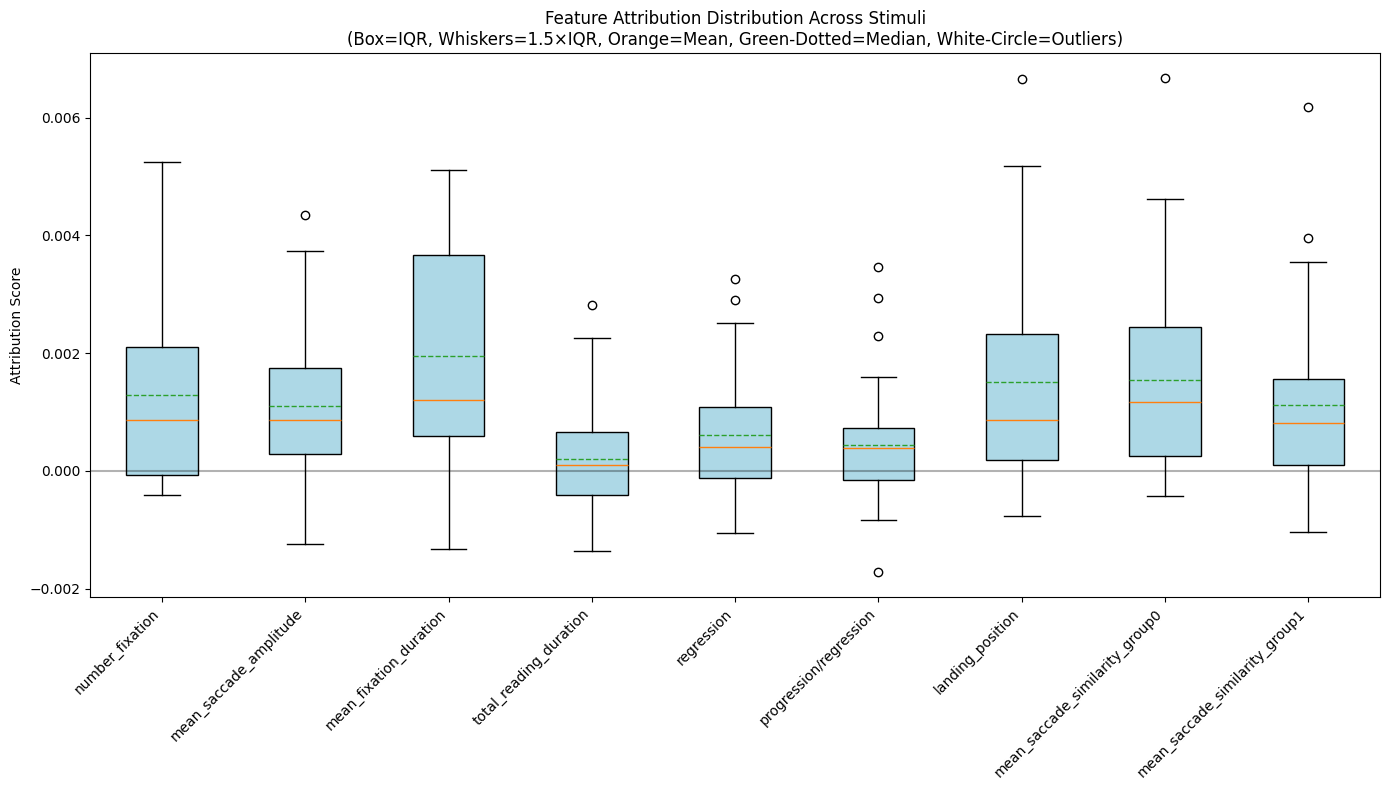


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0013, Std= 0.0016, Min=-0.0004, Max= 0.0053
mean_saccade_amplitude        : Mean= 0.0011, Std= 0.0013, Min=-0.0012, Max= 0.0043
mean_fixation_duration        : Mean= 0.0019, Std= 0.0017, Min=-0.0013, Max= 0.0051
total_reading_duration        : Mean= 0.0002, Std= 0.0009, Min=-0.0014, Max= 0.0028
regression                    : Mean= 0.0006, Std= 0.0011, Min=-0.0011, Max= 0.0033
progression/regression        : Mean= 0.0004, Std= 0.0010, Min=-0.0017, Max= 0.0035
landing_position              : Mean= 0.0015, Std= 0.0019, Min=-0.0008, Max= 0.0067
mean_saccade_similarity_group0: Mean= 0.0015, Std= 0.0016, Min=-0.0004, Max= 0.0067
mean_saccade_similarity_group1: Mean= 0.0011, Std= 0.0015, Min=-0.0010, Max= 0.0062


In [ ]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Mean Similarity features (without mean saccade amplitude)

In [ ]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.691569983959198
Epoch 5 loss: 0.4411211907863617
Epoch 10 loss: 0.3678385615348816
Epoch 15 loss: 0.333697646856308
Epoch 0 loss: 0.7340696454048157
Epoch 5 loss: 0.4155157804489136
Epoch 10 loss: 0.3486439883708954
Epoch 15 loss: 0.32595640420913696
Epoch 0 loss: 0.7250842452049255
Epoch 5 loss: 0.40184324979782104
Epoch 10 loss: 0.3718112111091614
Epoch 15 loss: 0.3365750312805176
Epoch 0 loss: 0.7070838809013367
Epoch 5 loss: 0.37452441453933716
Epoch 10 loss: 0.339431494474411
Epoch 15 loss: 0.33356404304504395
Epoch 0 loss: 0.6666660904884338
Epoch 5 loss: 0.42217889428138733
Epoch 10 loss: 0.3703303933143616
Epoch 15 loss: 0.3367362320423126
Epoch 0 loss: 0.7288629412651062
Epoch 5 loss: 0.3883489966392517
Epoch 10 loss: 0.34092122316360474
Epoch 15 loss: 0.34799766540527344
Epoch 0 loss: 0.8492009043693542
Epoch 5 loss: 0.42627763748168945
Epoch 10 loss: 0.3392270505428314
Epoch 15 loss: 0.3335351049900055
Epoch 0 loss: 0.8161524534225464
Epoch

In [ ]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.691569983959198
Epoch 5 loss: 0.4552018940448761
Epoch 10 loss: 0.3888428211212158
Epoch 15 loss: 0.3537968397140503
Epoch 0 loss: 0.7340696454048157
Epoch 5 loss: 0.44090384244918823
Epoch 10 loss: 0.3573986887931824
Epoch 15 loss: 0.34645119309425354
Epoch 0 loss: 0.7250842452049255
Epoch 5 loss: 0.4282001256942749
Epoch 10 loss: 0.3866061866283417
Epoch 15 loss: 0.3687538504600525
Epoch 0 loss: 0.7070838809013367
Epoch 5 loss: 0.3918110132217407
Epoch 10 loss: 0.36638143658638
Epoch 15 loss: 0.34566420316696167
Epoch 0 loss: 0.6666660904884338
Epoch 5 loss: 0.4474779963493347
Epoch 10 loss: 0.39534202218055725
Epoch 15 loss: 0.35284870862960815
Epoch 0 loss: 0.7288629412651062
Epoch 5 loss: 0.413367360830307
Epoch 10 loss: 0.35758617520332336
Epoch 15 loss: 0.3683100640773773
Epoch 0 loss: 0.8492009043693542
Epoch 5 loss: 0.43484601378440857
Epoch 10 loss: 0.3556337058544159
Epoch 15 loss: 0.3499738276004791
Epoch 0 loss: 0.8161524534225464
Epoch 5

Approximation Error: 0.0002688504464458674 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_159236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


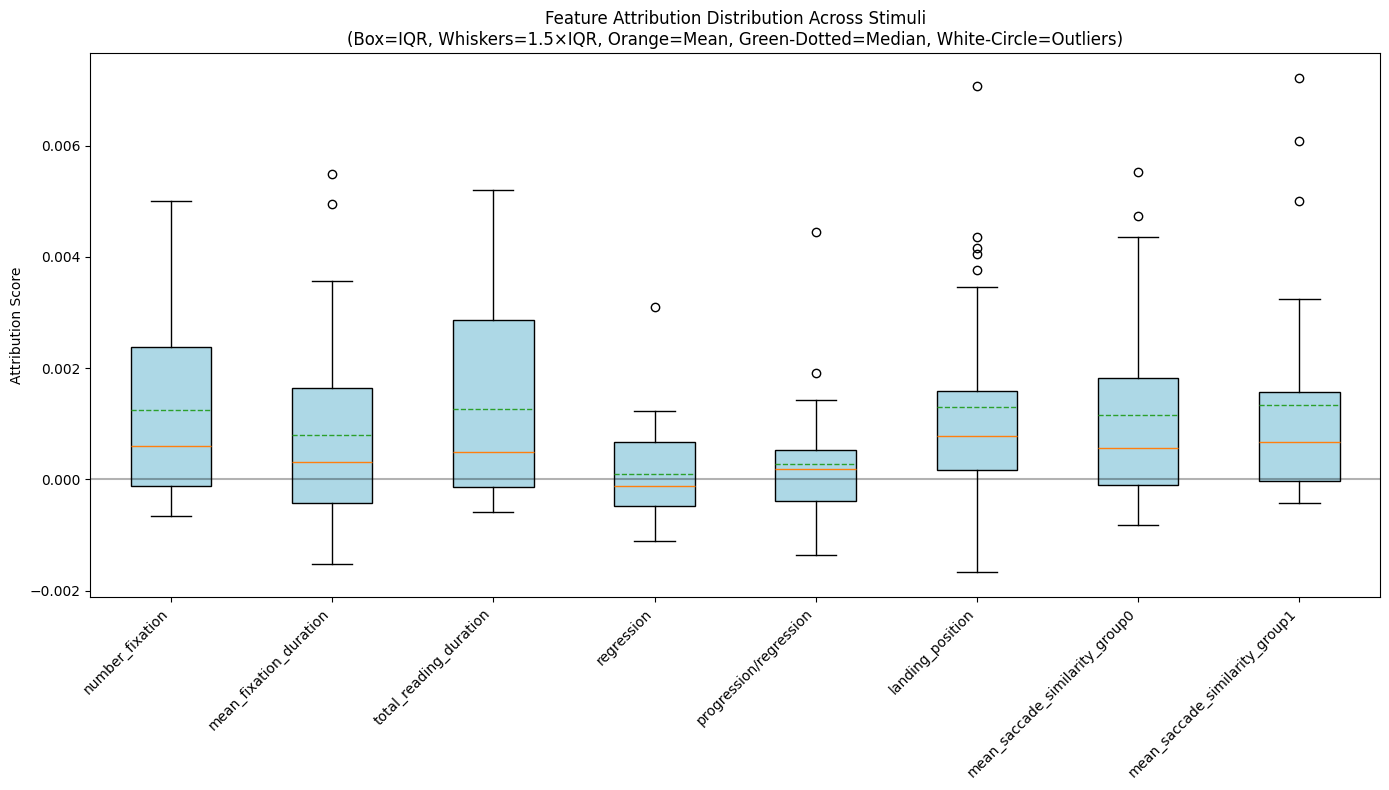


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0012, Std= 0.0017, Min=-0.0007, Max= 0.0050
mean_fixation_duration        : Mean= 0.0008, Std= 0.0017, Min=-0.0015, Max= 0.0055
total_reading_duration        : Mean= 0.0013, Std= 0.0017, Min=-0.0006, Max= 0.0052
regression                    : Mean= 0.0001, Std= 0.0009, Min=-0.0011, Max= 0.0031
progression/regression        : Mean= 0.0003, Std= 0.0011, Min=-0.0014, Max= 0.0044
landing_position              : Mean= 0.0013, Std= 0.0019, Min=-0.0017, Max= 0.0071
mean_saccade_similarity_group0: Mean= 0.0012, Std= 0.0017, Min=-0.0008, Max= 0.0055
mean_saccade_similarity_group1: Mean= 0.0013, Std= 0.0019, Min=-0.0004, Max= 0.0072


In [ ]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [29]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [30]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7736350297927856
Epoch 5 loss: 0.3991765081882477
Epoch 10 loss: 0.34539493918418884
Epoch 15 loss: 0.33514899015426636
Epoch 0 loss: 0.8237822651863098
Epoch 5 loss: 0.41621914505958557
Epoch 10 loss: 0.3548421561717987
Epoch 15 loss: 0.334322452545166
Epoch 0 loss: 0.7201504111289978
Epoch 5 loss: 0.3998492360115051
Epoch 10 loss: 0.3370068669319153
Epoch 15 loss: 0.3280657231807709
Epoch 0 loss: 0.6289030313491821
Epoch 5 loss: 0.3857024312019348
Epoch 10 loss: 0.3382491171360016
Epoch 15 loss: 0.3317309319972992
Epoch 0 loss: 0.5779648423194885
Epoch 5 loss: 0.3865489065647125
Epoch 10 loss: 0.3324938714504242
Epoch 15 loss: 0.3271794319152832
Epoch 0 loss: 0.8000914454460144
Epoch 5 loss: 0.4087076485157013
Epoch 10 loss: 0.34585079550743103
Epoch 15 loss: 0.3380735218524933
Epoch 0 loss: 0.6990944743156433
Epoch 5 loss: 0.37691426277160645
Epoch 10 loss: 0.3435106575489044
Epoch 15 loss: 0.33044177293777466
Epoch 0 loss: 0.7114675641059875
Epoch

Using device: cuda
Epoch 0 loss: 0.7736350297927856
Epoch 5 loss: 0.43020758032798767
Epoch 10 loss: 0.384158730506897
Epoch 15 loss: 0.3541480600833893
Epoch 0 loss: 0.8237822651863098
Epoch 5 loss: 0.4434555172920227
Epoch 10 loss: 0.3708658516407013
Epoch 15 loss: 0.35276710987091064
Epoch 0 loss: 0.7201504111289978
Epoch 5 loss: 0.42651787400245667
Epoch 10 loss: 0.36314383149147034
Epoch 15 loss: 0.32824212312698364
Epoch 0 loss: 0.6289030313491821
Epoch 5 loss: 0.41349858045578003
Epoch 10 loss: 0.36540061235427856
Epoch 15 loss: 0.34096288681030273
Epoch 0 loss: 0.5779648423194885
Epoch 5 loss: 0.40369680523872375
Epoch 10 loss: 0.35890504717826843
Epoch 15 loss: 0.3326452970504761
Epoch 0 loss: 0.8000914454460144
Epoch 5 loss: 0.4308694899082184
Epoch 10 loss: 0.35186052322387695
Epoch 15 loss: 0.350462406873703
Epoch 0 loss: 0.6990944743156433
Epoch 5 loss: 0.3947216868400574
Epoch 10 loss: 0.3696562349796295
Epoch 15 loss: 0.3523750603199005
Epoch 0 loss: 0.7114675641059875
E

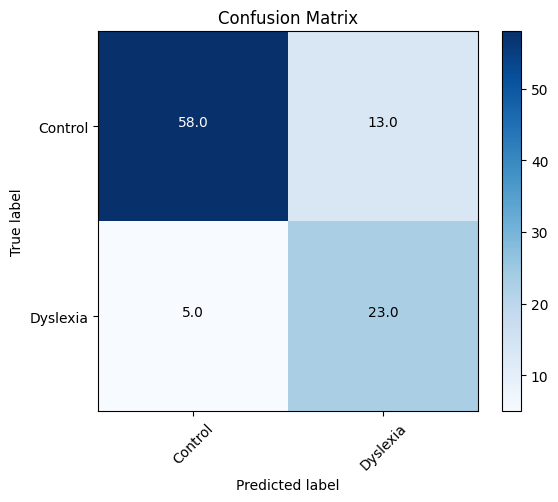

In [31]:
results = train_test_pipeline(stimuli, 0.5, plot_confusion_matrix=True)

Approximation Error: 0.00020980836416129023 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_159236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


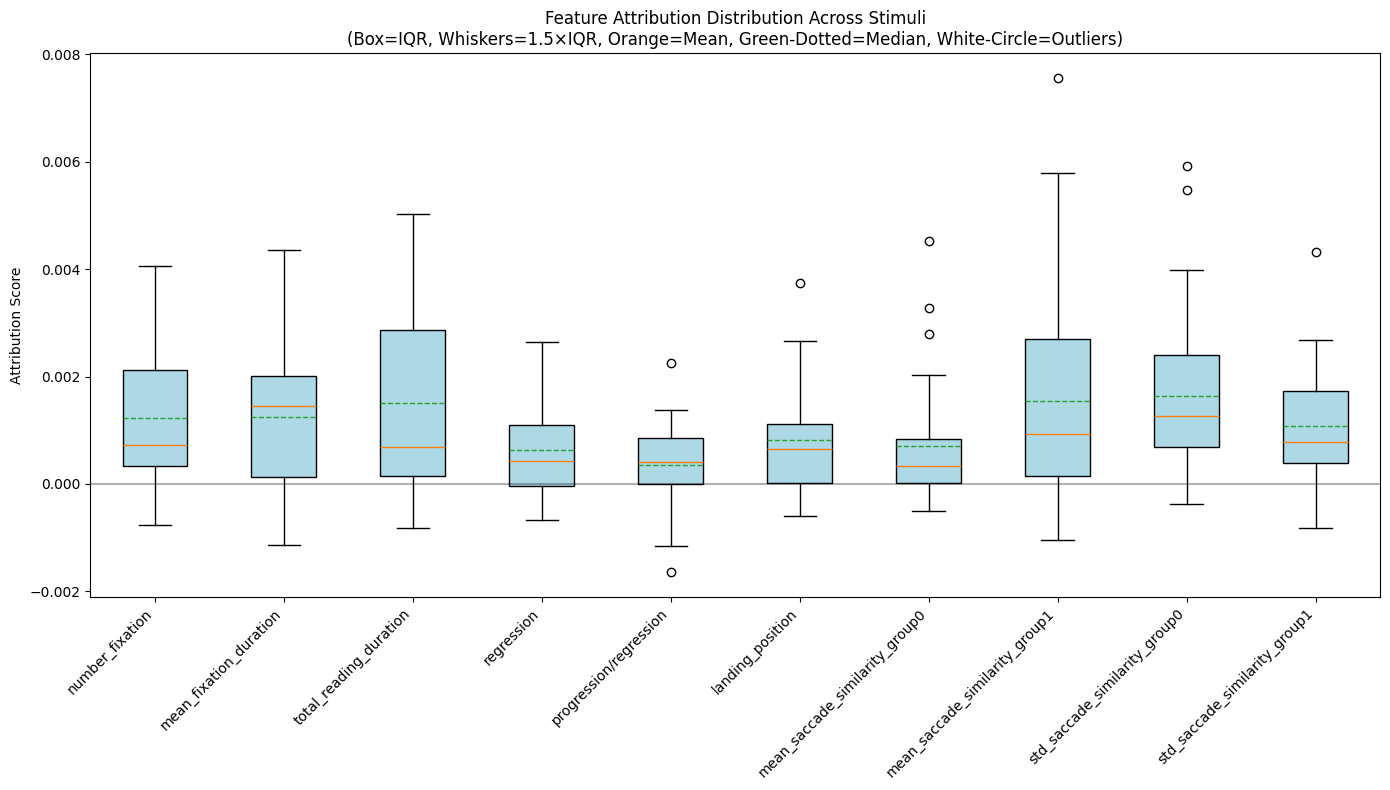


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0012, Std= 0.0013, Min=-0.0008, Max= 0.0041
mean_fixation_duration        : Mean= 0.0013, Std= 0.0012, Min=-0.0011, Max= 0.0044
total_reading_duration        : Mean= 0.0015, Std= 0.0017, Min=-0.0008, Max= 0.0050
regression                    : Mean= 0.0006, Std= 0.0009, Min=-0.0007, Max= 0.0026
progression/regression        : Mean= 0.0004, Std= 0.0008, Min=-0.0016, Max= 0.0023
landing_position              : Mean= 0.0008, Std= 0.0010, Min=-0.0006, Max= 0.0037
mean_saccade_similarity_group0: Mean= 0.0007, Std= 0.0011, Min=-0.0005, Max= 0.0045
mean_saccade_similarity_group1: Mean= 0.0015, Std= 0.0020, Min=-0.0011, Max= 0.0076
std_saccade_similarity_group0 : Mean= 0.0016, Std= 0.0015, Min=-0.0004, Max= 0.0059
std_saccade_similarity_group1 : Mean= 0.0011, Std= 0.0010, Min=-0.0008, Max= 0.0043


In [ ]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### All features

In [ ]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7188481688499451
Epoch 5 loss: 0.391039103269577
Epoch 10 loss: 0.34854838252067566
Epoch 15 loss: 0.35357028245925903
Epoch 0 loss: 0.617839515209198
Epoch 5 loss: 0.36737164855003357
Epoch 10 loss: 0.33907386660575867
Epoch 15 loss: 0.33829933404922485
Epoch 0 loss: 0.6888493895530701
Epoch 5 loss: 0.3914712369441986
Epoch 10 loss: 0.3528960943222046
Epoch 15 loss: 0.3277561664581299
Epoch 0 loss: 0.6410870552062988
Epoch 5 loss: 0.3877171576023102
Epoch 10 loss: 0.3205799162387848
Epoch 15 loss: 0.3182956576347351
Epoch 0 loss: 0.759905219078064
Epoch 5 loss: 0.3839937448501587
Epoch 10 loss: 0.3402354121208191
Epoch 15 loss: 0.32754433155059814
Epoch 0 loss: 0.7506846189498901
Epoch 5 loss: 0.38490089774131775
Epoch 10 loss: 0.3365725874900818
Epoch 15 loss: 0.32849475741386414
Epoch 0 loss: 0.7288788557052612
Epoch 5 loss: 0.3661664128303528
Epoch 10 loss: 0.3295401930809021
Epoch 15 loss: 0.327265202999115
Epoch 0 loss: 0.8059500455856323
Epoch 

In [ ]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7188481688499451
Epoch 5 loss: 0.4153905212879181
Epoch 10 loss: 0.3488385081291199
Epoch 15 loss: 0.3350808620452881
Epoch 0 loss: 0.617839515209198
Epoch 5 loss: 0.383297324180603
Epoch 10 loss: 0.34548619389533997
Epoch 15 loss: 0.33681613206863403
Epoch 0 loss: 0.6888493895530701
Epoch 5 loss: 0.4086545407772064
Epoch 10 loss: 0.34592485427856445
Epoch 15 loss: 0.33462005853652954
Epoch 0 loss: 0.6410870552062988
Epoch 5 loss: 0.4163437783718109
Epoch 10 loss: 0.3397665321826935
Epoch 15 loss: 0.33660322427749634
Epoch 0 loss: 0.759905219078064
Epoch 5 loss: 0.39578577876091003
Epoch 10 loss: 0.34933680295944214
Epoch 15 loss: 0.3384036123752594
Epoch 0 loss: 0.7506846189498901
Epoch 5 loss: 0.4099869728088379
Epoch 10 loss: 0.34494224190711975
Epoch 15 loss: 0.33916398882865906
Epoch 0 loss: 0.7288788557052612
Epoch 5 loss: 0.38831186294555664
Epoch 10 loss: 0.34329524636268616
Epoch 15 loss: 0.33417099714279175
Epoch 0 loss: 0.8059500455856323
E

Approximation Error: 0.0002654312120284885 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_159236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


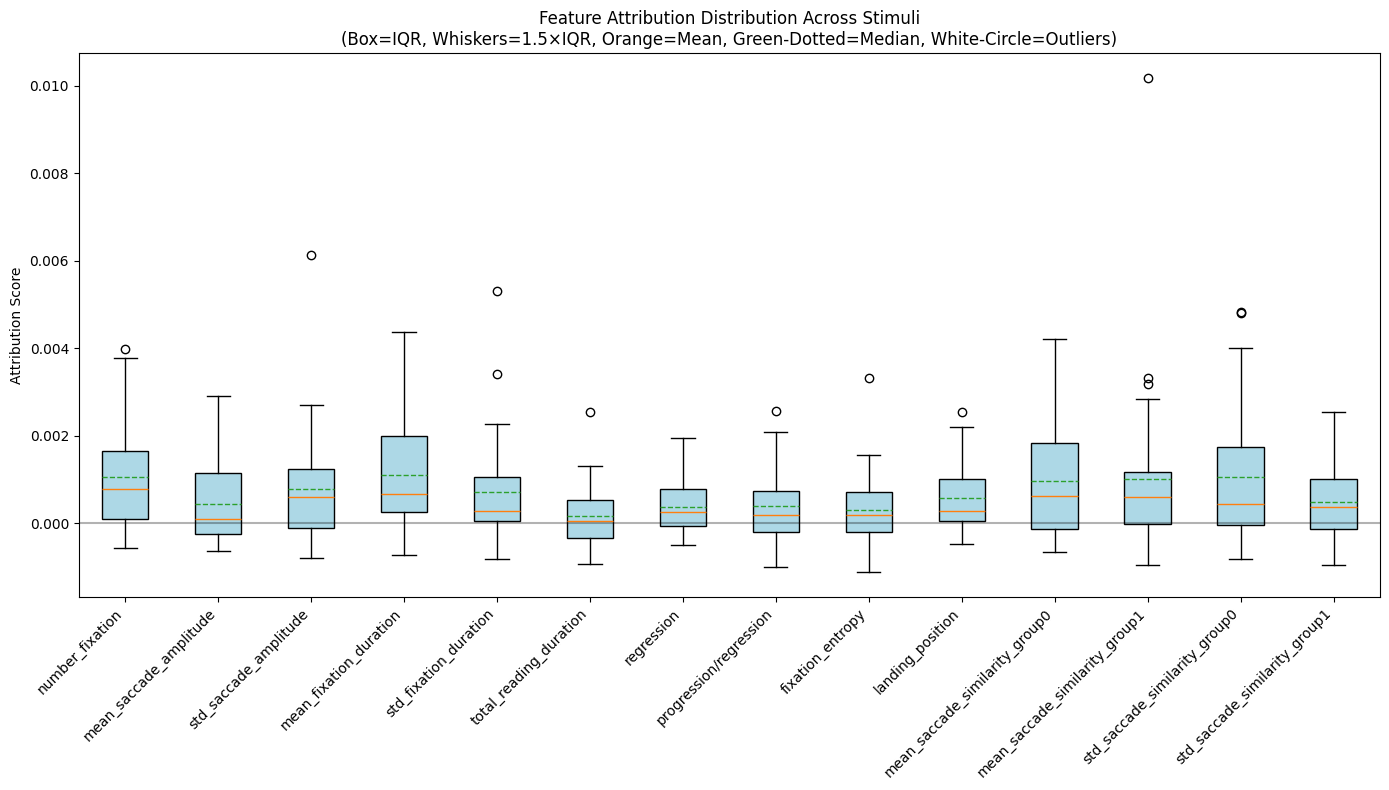


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0011, Std= 0.0012, Min=-0.0006, Max= 0.0040
mean_saccade_amplitude        : Mean= 0.0005, Std= 0.0009, Min=-0.0006, Max= 0.0029
std_saccade_amplitude         : Mean= 0.0008, Std= 0.0013, Min=-0.0008, Max= 0.0061
mean_fixation_duration        : Mean= 0.0011, Std= 0.0013, Min=-0.0007, Max= 0.0044
std_fixation_duration         : Mean= 0.0007, Std= 0.0012, Min=-0.0008, Max= 0.0053
total_reading_duration        : Mean= 0.0002, Std= 0.0007, Min=-0.0009, Max= 0.0025
regression                    : Mean= 0.0004, Std= 0.0006, Min=-0.0005, Max= 0.0019
progression/regression        : Mean= 0.0004, Std= 0.0008, Min=-0.0010, Max= 0.0026
fixation_entropy              : Mean= 0.0003, Std= 0.0008, Min=-0.0011, Max= 0.0033
landing_position              : Mean= 0.0006, Std= 0.0008, Min=-0.0005, Max= 0.0026
mean_saccade_similarity_group0: Mean= 0.0010, Std= 0.0013, Min=-0.000

In [ ]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

---

In [ ]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli,0.5)

Using device: cuda
Epoch 0 loss: 0.6871668696403503
Epoch 5 loss: 0.4174019694328308
Epoch 10 loss: 0.3465067744255066
Epoch 15 loss: 0.33904245495796204
Epoch 0 loss: 0.7675655484199524
Epoch 5 loss: 0.4369142949581146
Epoch 10 loss: 0.3501243591308594
Epoch 15 loss: 0.33639460802078247
Epoch 0 loss: 0.7062104940414429
Epoch 5 loss: 0.4183308780193329
Epoch 10 loss: 0.3576020300388336
Epoch 15 loss: 0.34222573041915894
Epoch 0 loss: 0.7145898938179016
Epoch 5 loss: 0.40072986483573914
Epoch 10 loss: 0.3464343249797821
Epoch 15 loss: 0.3358187675476074
Epoch 0 loss: 0.6518523693084717
Epoch 5 loss: 0.4222424626350403
Epoch 10 loss: 0.356441855430603
Epoch 15 loss: 0.3512435257434845
Epoch 0 loss: 0.7687975168228149
Epoch 5 loss: 0.38376206159591675
Epoch 10 loss: 0.3419097661972046
Epoch 15 loss: 0.32714882493019104
Epoch 0 loss: 0.8048970103263855
Epoch 5 loss: 0.4131929576396942
Epoch 10 loss: 0.35297691822052
Epoch 15 loss: 0.34451010823249817
Epoch 0 loss: 0.8258506059646606
Epoch 